In [1]:
from motor_analysis import *
import numpy as np
import scipy.optimize as opt

Check correctness of code by comparing to computations in pensiky Figure 7

In [2]:
motor = Inchworm(2e-6, 69,7.28e-6, gap_final=1e-6, L_overlap = 104e-6)

In [3]:
print(f'{motor.L_max*1e6: .0f} um is maximum finger length')

 114 um is maximum finger length


In [4]:
motor.comp_k_spr()

11.095130707990037

In [5]:
motor.L_arm

0.000123637970511611

In [6]:
f_load = motor.force_load
f_load

0.0010648235341337295

In [7]:
motor.comp_k_spr_max()

313.57892711915844

In [8]:
motor.L_arm

0.000123637970511611

In [9]:
area = motor.comp_total_area(10e-6, 10e-6, L_anchor = 50e-6)
area

4.435603810944993e-07

In [10]:
f_a = f_load/area *1e-3
print(f'{f_a:.2f} mN/mm^2')

2.40 mN/mm^2


In [11]:
motor.thickness

3.9999999999999996e-05

In [12]:
motor.g1

5.767728070070832e-06

In [13]:
motor.g2

8.651592105106247e-06

In [14]:
motor2 = Inchworm(1e-6, 55,1e-6)

In [15]:
motor2.g1

3.70020753820971e-06

In [16]:
motor2.g2

5.550311307314565e-06

In [17]:
motor2.comp_finger_L_max()

2.5683947736922057e-05

In [18]:
f_load = motor2.force_load
f_load

0.0002521883775078824

In [19]:
area = motor2.comp_electrode_area()

In [20]:
f_A = motor2.f_load_per_area
print(f'Sould give 10.9 mN/mm2: {f_A*1e-3:.1f} mN/mm2')

Sould give 10.9 mN/mm2: 10.9 mN/mm2


In [21]:
x = [1e-6,72, 1e-6, 25e-6]
min_feat = x[0]
arm_angle = x[1]
width = x[2]
L_overlap = x[3]
kwargs = {}
motor = Inchworm(min_feat, arm_angle, width, 2*min_feat, L_overlap, **kwargs)
-motor.f_load_per_area

-9219.803559129288

In [22]:
import logging
# logging.basicConfig(level = logging.DEBUG)
params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6}
mo = MotorOptimizer([2e-6, 70, 4e-6, 104e-6], [1e-6, 15, 1e-6, 5e-6], [(1e-6, None), (15, 90), (None,None), (10e-6, None)],params, log_level=logging.INFO)
result,x,output, motor = mo.optimize()
print('Compare with 10.9 mN/mm2')
print(motor)


INFO:root:Maximum, optimized value 10923.209749809464.Achieved at MF = 1.00 um, angle = 55.4 deg, width = 1.00um, and overlap lenght = 10.00um


Compare with 10.9 mN/mm2
Object representing motor with parameters:

        PROCESS: MF = 1.00um, thikness = 20 um 

        GAPS: g1 = 3.69um, g2 = 5.54um, g_f = 1.0,

        FINGERS: L_overlap = 10.00um, L_max = 25.68um,  finger_width = 1.00um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 55.4 deg, L_arm = 128.5um, arm_width = 1.0 um

        FLEXURE: k_spring = 0.1N/m, k_spring_max = 57.5N/m 
        FORCE: at 110V is 0.10 mN and per F/A = 10.9 mN/mm2 and F/A_tot = 1.1

        EFFICIENCY: 22.89%, maximum is 24.17


In [23]:
params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'gap_final': 1e-6, 'num_of_fingers': 40}
mo = MotorOptimizer([2e-6, 70, 7e-6, 104e-6], [1e-6, 15, 1e-6, 5e-6], [(2e-6, 5e-6), (10, 85), (None,None), (10e-6, None)],params, log_level=logging.INFO)

In [24]:
# result = opt.minimize(mo.objective_function, mo.x0, method = "COBYLA", constraints=mo.constraints, options = {'rhobeg': 1, 'maxiter': 10000} )
result,x,output, motor = mo.optimize(obj= mo.force_per_total_area)
print(motor)

INFO:root:Maximum, optimized value -0.0.Achieved at MF = 2.00 um, angle = 70.0 deg, width = 7.00um, and overlap lenght = 104.00um


Object representing motor with parameters:

        PROCESS: MF = 2.00um, thikness = 40 um 

        GAPS: g1 = 5.73um, g2 = 8.59um, g_f = 1.0,

        FINGERS: L_overlap = 104.00um, L_max = 110.82um,  finger_width = 7.00um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 70.0 deg, L_arm = 121.2um, arm_width = 2.0 um

        FLEXURE: k_spring = 10.7N/m, k_spring_max = 320.2N/m 
        FORCE: at 110V is 1.06 mN and per F/A = 4.5 mN/mm2 and F/A_tot = 2.4

        EFFICIENCY: 23.73%, maximum is 24.38


In [25]:
motor = Inchworm(1e-6, 52, 7.28e-6, None,104e-6)
print(motor)

Object representing motor with parameters:

        PROCESS: MF = 1.00um, thikness = 20 um 

        GAPS: g1 = 3.78um, g2 = 5.67um, g_f = 1.0,

        FINGERS: L_overlap = 104.00um, L_max = 113.83um,  finger_width = 7.28um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 52.0 deg, L_arm = 41.2um, arm_width = 1.0 um

        FLEXURE: k_spring = 5.5N/m, k_spring_max = 556.4N/m 
        FORCE: at 110V is 1.03 mN and per F/A = 5.1 mN/mm2 and F/A_tot = 0.0

        EFFICIENCY: 23.07%, maximum is 24.62


In [26]:
motor = Inchworm(2e-6, 69, 7.28e-6, None,104e-6, gap_final=1e-6, L_sup = 10e-6, L_frame = 10e-6, L_anchor=50e-6)
print(motor)

Object representing motor with parameters:

        PROCESS: MF = 2.00um, thikness = 40 um 

        GAPS: g1 = 5.77um, g2 = 8.65um, g_f = 1.0,

        FINGERS: L_overlap = 104.00um, L_max = 114.13um,  finger_width = 7.28um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 69.0 deg, L_arm = 123.6um, arm_width = 2.0 um

        FLEXURE: k_spring = 11.1N/m, k_spring_max = 313.6N/m 
        FORCE: at 110V is 1.06 mN and per F/A = 4.4 mN/mm2 and F/A_tot = 2.4

        EFFICIENCY: 23.89%, maximum is 24.57


In [27]:
params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6, 'arm_width':1.5e-6}
mo = MotorOptimizer([2.75e-6, 75, 7e-6, 104e-6], [1e-6, 5, 1e-6, 5e-6], [(1e-6, 5e-6), (10, 85), (None,None), (25e-6, None)],params, log_level=logging.INFO)
mo.constraints.append({'type':'ineq', 'fun':mo.min_finger_L})
result,x,output, motor = mo.optimize(obj= mo.efficiency)
print(motor)


INFO:root:Maximum, optimized value 0.24428118112623898.Achieved at MF = 3.03 um, angle = 71.9 deg, width = 3.03um, and overlap lenght = 59.23um


Object representing motor with parameters:

        PROCESS: MF = 3.03um, thikness = 61 um 

        GAPS: g1 = 8.06um, g2 = 12.09um, g_f = 1.0,

        FINGERS: L_overlap = 59.23um, L_max = 59.23um,  finger_width = 3.03um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 71.9 deg, L_arm = 120.5um, arm_width = 1.5 um

        FLEXURE: k_spring = 4.0N/m, k_spring_max = 99.3N/m 
        FORCE: at 110V is 0.62 mN and per F/A = 5.0 mN/mm2 and F/A_tot = 2.1

        EFFICIENCY: 24.43%, maximum is 25.00


In [28]:
motor.width
motor2 = Inchworm(2.75e-6, 25, 2.75e-6, None, None, gap_final=1e-6)
print(motor2)

Object representing motor with parameters:

        PROCESS: MF = 2.75um, thikness = 55 um 

        GAPS: g1 = 12.40um, g2 = 18.60um, g_f = 1.0,

        FINGERS: L_overlap = 55.03um, L_max = 55.03um,  finger_width = 2.75um,  N (number of fingers) = 40

        FLEXIBLE ARM: angle = 25.0 deg, L_arm = 802.2um, arm_width = 2.8 um

        FLEXURE: k_spring = 3.0N/m, k_spring_max = 23.0N/m 
        FORCE: at 110V is 0.23 mN and per F/A = 1.4 mN/mm2 and F/A_tot = 0.0

        EFFICIENCY: 9.72%, maximum is 12.40


In [29]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
MF = np.arange(1,5,0.1)*1e-6
angle = np.arange(85,10, -2)
MFx, angley = np.meshgrid(MF, angle)
def force_area(MF, angle):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6}
    motor = Inchworm(MF, angle, MF, None, **params)
    return motor.f_load_per_area, motor.k_spr/motor.k_spr_max
MFx.shape, angley.shape
F = np.zeros(MFx.shape)
Spring = np.zeros(MFx.shape)
for i in range(len(angle)):
    for j in range(len(MF)):
        F[i,j], Spring[i,j] = force_area(MFx[i,j], angley[i,j])

    

In [30]:
angles = np.zeros(MF.shape)
F_angle = np.zeros(MF.shape)
for count,mf in enumerate(MF):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6}
    mo = MotorOptimizer([mf, 75, 7e-6, 104e-6], [1e-6, 5, 1e-6, 5e-6], [(mf, 5e-6), (10, 85), (None,None), (2e-6, None)],params, log_level=logging.INFO)
    result,x,output, motor = mo.optimize()
    if x[0]-mf >1e-9:
        print('problem', mf, x[0])
    angles[count]= x[1]
    F_angle[count] = output

INFO:root:Maximum, optimized value 10935.365655027752.Achieved at MF = 1.00 um, angle = 55.4 deg, width = 1.00um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 10360.593681324326.Achieved at MF = 1.10 um, angle = 57.4 deg, width = 1.10um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 9840.547723887348.Achieved at MF = 1.20 um, angle = 59.2 deg, width = 1.20um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 9368.314182454857.Achieved at MF = 1.30 um, angle = 60.8 deg, width = 1.30um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8937.949038460561.Achieved at MF = 1.40 um, angle = 62.2 deg, width = 1.40um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8544.363939483364.Achieved at MF = 1.50 um, angle = 63.6 deg, width = 1.50um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8183.205726274054.Achieved at MF = 1.60 um, angle = 64.7 deg, width = 1.60um, and overlap lenght = 2.00um
INFO:root:M

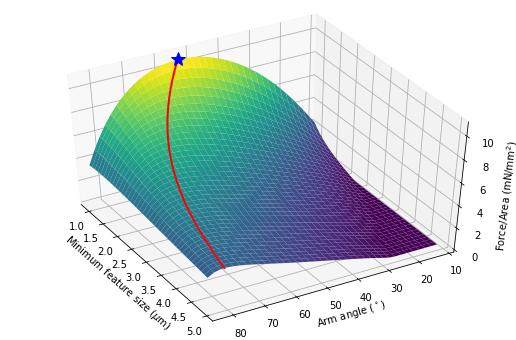

In [31]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(MFx*1e6, angley, F*1e-3, cmap='viridis', edgecolor='none')
ax.set_ylabel(r'Arm angle ($^\circ$)')
ax.set_xlabel(r'Minimum feature size ($\mu$m)')
ax.set_zlabel(r'Force/Area (mN/mm$^2$)')
ax.plot3D(MF*1e6, angles, F_angle*1e-3, 'red', linewidth = 2, zorder = 10)
ax.plot3D([MF[0]*1e6], [angles[0]], [F_angle[0]*1e-3], 'blue', marker = '*', zorder = 20, markersize = 15)
ax.set_ylim(85, 10)
ax.view_init(45,-30)
fig.set_size_inches(9,6)
# fig.set_dpi(600)

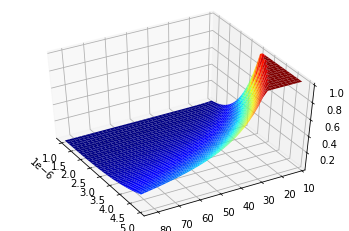

In [32]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(MFx, angley, Spring, cmap='jet', edgecolor='none')
ax.set_ylim(85, 10)
ax.view_init(45,-30)

## Figure 7
Code above shows figure 7 reproduced from paper

In [33]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
MF = np.arange(1,5,0.1)*1e-6
angle = np.arange(85,10, -2)
MFx, angley = np.meshgrid(MF, angle)
def force_area(MF, angle):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6, 'f_res': 10e3}
    motor = InchwormSpeed(MF, angle, MF, None, **params)
    return motor.f_load_per_area, motor.k_spr/motor.k_spr_max
MFx.shape, angley.shape
F = np.zeros(MFx.shape)
Spring = np.zeros(MFx.shape)
for i in range(len(angle)):
    for j in range(len(MF)):
        F[i,j], Spring[i,j] = force_area(MFx[i,j], angley[i,j])

In [34]:
angles = np.zeros(MF.shape)
F_angle = np.zeros(MF.shape)
for count,mf in enumerate(MF):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6, 'f_res': 10e3}
    mo = MotorOptimizer([mf, 75, 7e-6, 104e-6], [1e-6, 5, 1e-6, 5e-6], [(mf, 5e-6), (10, 85), (None,None), (2e-6, None)],params, log_level=logging.INFO, motor_class=InchwormSpeed)
    result,x,output, motor = mo.optimize()
    if x[0]-mf >1e-9:
        print('problem', mf, x[0])
    angles[count]= x[1]
    F_angle[count] = output

INFO:root:Maximum, optimized value 10924.117385478497.Achieved at MF = 1.00 um, angle = 55.4 deg, width = 1.00um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 10347.577398949856.Achieved at MF = 1.10 um, angle = 57.4 deg, width = 1.10um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 9825.702724820627.Achieved at MF = 1.20 um, angle = 59.2 deg, width = 1.20um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 9351.586725519282.Achieved at MF = 1.30 um, angle = 60.9 deg, width = 1.30um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8919.291367544341.Achieved at MF = 1.40 um, angle = 62.3 deg, width = 1.40um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8523.733481941734.Achieved at MF = 1.50 um, angle = 63.6 deg, width = 1.50um, and overlap lenght = 2.00um
INFO:root:Maximum, optimized value 8160.564432760568.Achieved at MF = 1.60 um, angle = 64.8 deg, width = 1.60um, and overlap lenght = 2.00um
INFO:root:M

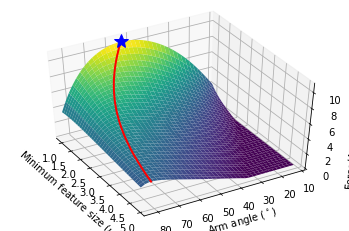

In [35]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
MF = np.arange(1,5,0.1)*1e-6
angle = np.arange(85,10, -2)
MFx, angley = np.meshgrid(MF, angle)
def efficiency(MF, angle):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6, 'arm_width':1.5e-6}
    motor = Inchworm(MF, angle, MF, None, **params)
    return motor.efficiency
MFx.shape, angley.shape
E = np.zeros(MFx.shape)
for i in range(len(angle)):
    for j in range(len(MF)):
        E[i,j] = efficiency(MFx[i,j], angley[i,j])
ax = plt.axes(projection='3d')
ax.plot_surface(MFx*1e6, angley, F*1e-3, cmap='viridis', edgecolor='none')
ax.set_ylabel(r'Arm angle ($^\circ$)')
ax.set_xlabel(r'Minimum feature size ($\mu$m)')
ax.set_zlabel(r'Force/Area (mN/mm$^2$)')
ax.plot3D(MF*1e6, angles, F_angle*1e-3, 'red', linewidth = 2, zorder = 10)
ax.plot3D([MF[0]*1e6], [angles[0]], [F_angle[0]*1e-3], 'blue', marker = '*', zorder = 20, markersize = 15)
ax.set_ylim(85, 10)
ax.view_init(45,-30)
fig.set_size_inches(9,6)
    

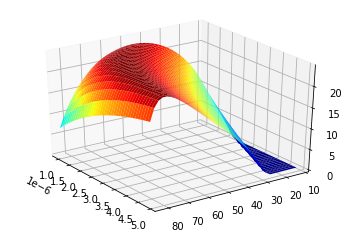

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
# fig.set_size_inches(10,10)
ax = plt.axes(projection='3d')
ax.plot_surface(MFx, angley, E*100, cmap='jet', edgecolor='none')
ax.set_ylim(85, 10)
ax.view_init(30,-35)

# Figure 8
The code above shows figure 8 reproduced from  Penskiy paper

In [37]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
MF = np.arange(1,5,0.1)*1e-6
angle = np.arange(85,10, -2)
MFx, angley = np.meshgrid(MF, angle)
def force_t_area(MF, angle):
    params = {'L_sup':10e-6, 'L_frame': 10e-6, 'L_anchor': 50e-6, 'num_of_fingers': 40, 'gap_final': 1e-6, 'arm_width':1.5e-6}
    motor = Inchworm(MF, angle, MF, None, **params)
    motor.comp_L_arm()
    motor.comp_f_load_per_total_area()
    return motor.f_load_per_total_area , motor.k_spr/motor.k_spr_max
MFx.shape, angley.shape
F_ta = np.zeros(MFx.shape)
Spring = np.zeros(MFx.shape)
for i in range(len(angle)):
    for j in range(len(MF)):
        F_ta[i,j], Spring[i,j] = force_t_area(MFx[i,j], angley[i,j])


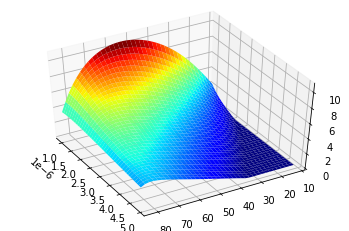

In [38]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(MFx, angley, F*1e-3, cmap='jet', edgecolor='none')
ax.set_ylim(85, 10)
ax.view_init(45,-30)

In [41]:
import matplotlib
isinstance(ax, matplotlib.pyplot.Axes)

True